In [ ]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | moron
Processing Record 5 of Set 1 | bambous virieux
Processing Record 6 of Set 1 | zhaoyang
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | santiago del estero
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | sibolga
Processing Record 11 of Set 1 | mwinilunga
Processing Record 12 of Set 1 | diffa
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | tevaitoa
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | port augusta
Processing Record 19 of Set 1 | marsh harbour
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | inuvik
Processing Record 22 of Set 1 |

Processing Record 39 of Set 4 | camocim
Processing Record 40 of Set 4 | komsomolskiy
Processing Record 41 of Set 4 | teahupoo
Processing Record 42 of Set 4 | mandera
Processing Record 43 of Set 4 | malwan
City not found. Skipping...
Processing Record 44 of Set 4 | naze
Processing Record 45 of Set 4 | oyama
Processing Record 46 of Set 4 | yakeshi
Processing Record 47 of Set 4 | edd
Processing Record 48 of Set 4 | clyde river
Processing Record 49 of Set 4 | nuuk
Processing Record 50 of Set 4 | sola
Processing Record 1 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 5 | cap malheureux
Processing Record 3 of Set 5 | saskylakh
Processing Record 4 of Set 5 | lafiagi
Processing Record 5 of Set 5 | hamilton
Processing Record 6 of Set 5 | isangel
Processing Record 7 of Set 5 | sao desiderio
Processing Record 8 of Set 5 | talnakh
Processing Record 9 of Set 5 | naugarzan
City not found. Skipping...
Processing Record 10 of Set 5 | perth
Processing Record 11

Processing Record 25 of Set 8 | bhinmal
Processing Record 26 of Set 8 | longyearbyen
Processing Record 27 of Set 8 | ilo
Processing Record 28 of Set 8 | marfino
Processing Record 29 of Set 8 | lahij
Processing Record 30 of Set 8 | odweyne
Processing Record 31 of Set 8 | kishi
Processing Record 32 of Set 8 | piacabucu
Processing Record 33 of Set 8 | derzhavinsk
Processing Record 34 of Set 8 | zhigansk
Processing Record 35 of Set 8 | bababe
City not found. Skipping...
Processing Record 36 of Set 8 | baruun-urt
Processing Record 37 of Set 8 | diego de almagro
Processing Record 38 of Set 8 | qasigiannguit
Processing Record 39 of Set 8 | ames
Processing Record 40 of Set 8 | verkhoyansk
Processing Record 41 of Set 8 | olafsvik
Processing Record 42 of Set 8 | eskasem
City not found. Skipping...
Processing Record 43 of Set 8 | alice springs
Processing Record 44 of Set 8 | leh
Processing Record 45 of Set 8 | college
Processing Record 46 of Set 8 | vao
Processing Record 47 of Set 8 | turukhansk


Processing Record 14 of Set 12 | raglan
Processing Record 15 of Set 12 | honiara
Processing Record 16 of Set 12 | ilebo
Processing Record 17 of Set 12 | sechura
Processing Record 18 of Set 12 | susanville
Processing Record 19 of Set 12 | cascais
Processing Record 20 of Set 12 | cheuskiny
City not found. Skipping...
Processing Record 21 of Set 12 | kloulklubed
Processing Record 22 of Set 12 | san miguel
Processing Record 23 of Set 12 | calamar
Processing Record 24 of Set 12 | dwarka
Processing Record 25 of Set 12 | floro
Processing Record 26 of Set 12 | iralaya
Processing Record 27 of Set 12 | payo
Processing Record 28 of Set 12 | porto novo
Processing Record 29 of Set 12 | chenghai
Processing Record 30 of Set 12 | la ronge
Processing Record 31 of Set 12 | beaverlodge
Processing Record 32 of Set 12 | atar
Processing Record 33 of Set 12 | alyangula
Processing Record 34 of Set 12 | lagunas
Processing Record 35 of Set 12 | ayan
Processing Record 36 of Set 12 | roma
Processing Record 37 of 

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,31.73,88,100,2.37,US,2022-03-11 03:10:18
1,Puerto Ayora,-0.7393,-90.3518,77.56,93,97,3.11,EC,2022-03-11 03:14:31
2,Provideniya,64.3833,-173.3000,21.36,68,0,34.00,RU,2022-03-11 03:14:31
3,Moron,-34.6534,-58.6198,65.98,74,0,2.04,AR,2022-03-11 03:14:31
4,Bambous Virieux,-20.3428,57.7575,78.22,82,14,10.18,MU,2022-03-11 03:14:32
5,Zhaoyang,42.6820,126.0305,41.65,25,0,13.65,CN,2022-03-11 03:14:32
6,Santiago Del Estero,-27.7951,-64.2615,66.43,84,79,4.99,AR,2022-03-11 03:14:33
7,Port Elizabeth,-33.9180,25.5701,67.60,92,4,5.37,ZA,2022-03-11 03:14:33
8,Sibolga,1.7427,98.7792,79.83,81,95,2.59,ID,2022-03-11 03:12:42
9,Mwinilunga,-11.7358,24.4293,63.14,98,100,2.91,ZM,2022-03-11 03:14:34


In [7]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [9]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1646969469.54426

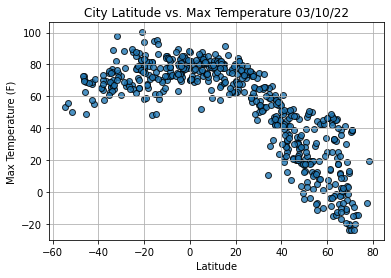

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

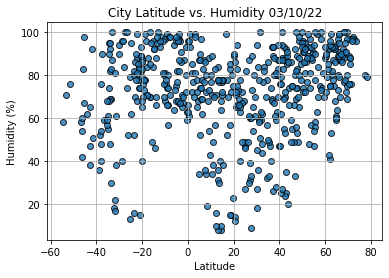

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

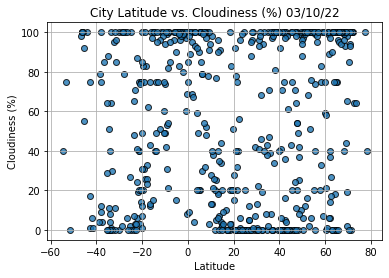

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

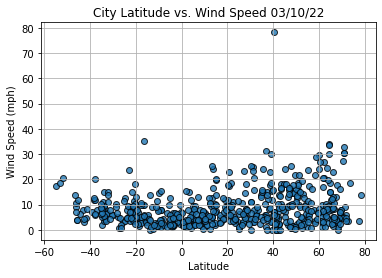

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,31.73,88,100,2.37,US,2022-03-11 03:10:18
2,Provideniya,64.3833,-173.3000,21.36,68,0,34.00,RU,2022-03-11 03:14:31
5,Zhaoyang,42.6820,126.0305,41.65,25,0,13.65,CN,2022-03-11 03:14:32
8,Sibolga,1.7427,98.7792,79.83,81,95,2.59,ID,2022-03-11 03:12:42
10,Diffa,13.3154,12.6113,73.00,31,19,12.53,NE,2022-03-11 03:14:35
...,...,...,...,...,...,...,...,...,...
551,Matay,28.4190,30.7792,48.72,54,1,7.96,EG,2022-03-11 03:29:46
552,Vagamo,61.8751,9.0967,24.91,96,97,3.31,NO,2022-03-11 03:29:47
553,Camacha,33.0833,-16.3333,60.22,82,40,9.22,PT,2022-03-11 03:30:47
554,Tamiahua,21.2667,-97.4500,67.95,94,32,5.99,MX,2022-03-11 03:30:48


In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,31.73,88,100,2.37,US,2022-03-11 03:10:18
2,Provideniya,64.3833,-173.3000,21.36,68,0,34.00,RU,2022-03-11 03:14:31
5,Zhaoyang,42.6820,126.0305,41.65,25,0,13.65,CN,2022-03-11 03:14:32
8,Sibolga,1.7427,98.7792,79.83,81,95,2.59,ID,2022-03-11 03:12:42
10,Diffa,13.3154,12.6113,73.00,31,19,12.53,NE,2022-03-11 03:14:35


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

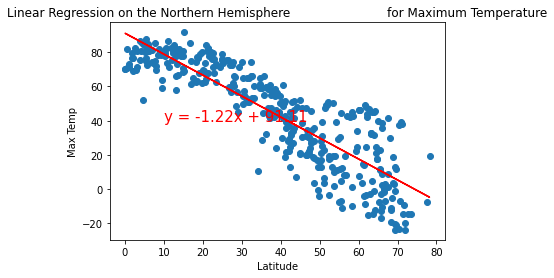

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

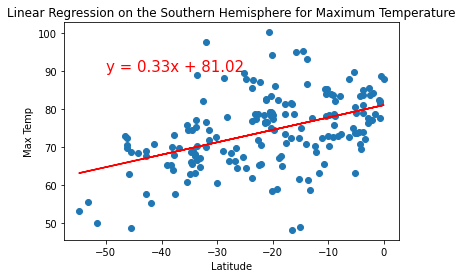

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

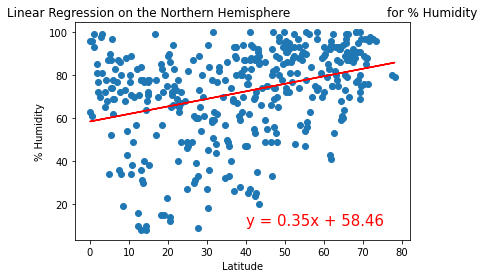

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

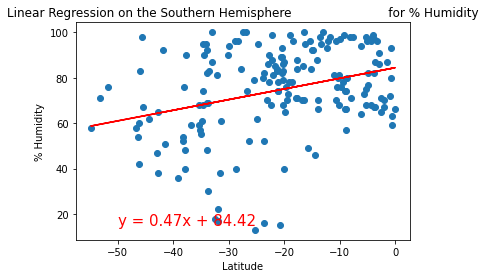

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

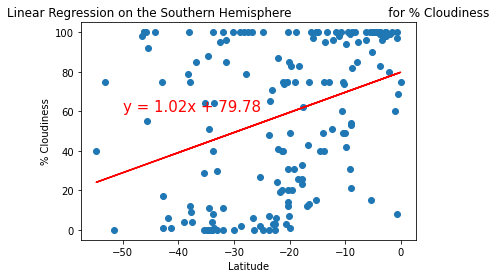

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

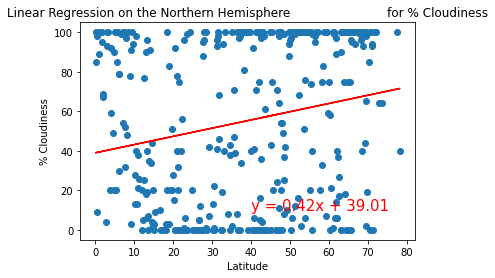

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

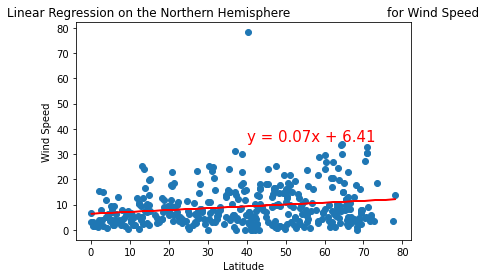

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

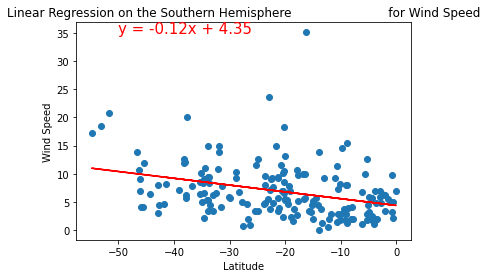

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))